<a href="https://colab.research.google.com/github/Immanuel-01/Global-Health/blob/main/Global_Health.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd

# Load the dataset

gbh = pd.read_csv("Global Health Statistics.csv")

# Check the number of rows in the dataset
print(f"Total rows in the dataset: {len(gbh)}")

Total rows in the dataset: 312074


In [2]:
# Select a random subset of 300 rows
gbh_subset = gbh.sample(n=300, random_state=42) # random_state ensures reproducibility

# Check the number of rows in the subset
print(f"Number of rows in the subset: {len(gbh_subset)}")

Number of rows in the subset: 300


In [3]:
# Display the first few rows of the dataset

print(gbh_subset.head())

             Country  Year         Disease Name Disease Category  \
241165  Saudi Arabia  2021             COVID-19       Autoimmune   
63979         Canada  2003                Polio            Viral   
121325        Canada  2023               Rabies       Autoimmune   
13715         France  2021  Parkinson's Disease        Parasitic   
290776   South Korea  2000               Asthma          Genetic   

        Prevalence Rate (%)  Incidence Rate (%)  Mortality Rate (%) Age Group  \
241165                 1.20               12.65                0.22      0-18   
63979                 17.53                5.04                8.09     36-60   
121325                 2.37               14.06                4.56     19-35   
13715                 16.91                3.98                3.15      0-18   
290776                 4.82               13.60                7.81       61+   

        Gender  Population Affected  ...  Hospital Beds per 1000  \
241165  Female               597705 

In [4]:
print(gbh_subset.info())   # Get basic information about the dataset

<class 'pandas.core.frame.DataFrame'>
Index: 300 entries, 241165 to 239556
Data columns (total 22 columns):
 #   Column                              Non-Null Count  Dtype  
---  ------                              --------------  -----  
 0   Country                             300 non-null    object 
 1   Year                                300 non-null    int64  
 2   Disease Name                        300 non-null    object 
 3   Disease Category                    300 non-null    object 
 4   Prevalence Rate (%)                 300 non-null    float64
 5   Incidence Rate (%)                  300 non-null    float64
 6   Mortality Rate (%)                  300 non-null    float64
 7   Age Group                           300 non-null    object 
 8   Gender                              300 non-null    object 
 9   Population Affected                 300 non-null    int64  
 10  Healthcare Access (%)               300 non-null    float64
 11  Doctors per 1000                    300 no

In [5]:
print(gbh_subset.describe())  # Summary statistics for numerical columns

              Year  Prevalence Rate (%)  Incidence Rate (%)  \
count   300.000000           300.000000          300.000000   
mean   2012.663333             9.788033            7.576433   
std       6.791446             5.765088            4.285299   
min    2000.000000             0.120000            0.100000   
25%    2007.000000             4.850000            3.777500   
50%    2013.000000             9.625000            7.550000   
75%    2018.000000            15.092500           11.007500   
max    2024.000000            19.980000           14.980000   

       Mortality Rate (%)  Population Affected  Healthcare Access (%)  \
count          300.000000           300.000000             300.000000   
mean             5.074833        492616.176667              73.022600   
std              2.937288        280547.207790              14.291189   
min              0.110000          1006.000000              50.480000   
25%              2.557500        255550.250000              60.1000

In [6]:
# Check for missing values

print(gbh_subset.isnull().sum())

Country                               0
Year                                  0
Disease Name                          0
Disease Category                      0
Prevalence Rate (%)                   0
Incidence Rate (%)                    0
Mortality Rate (%)                    0
Age Group                             0
Gender                                0
Population Affected                   0
Healthcare Access (%)                 0
Doctors per 1000                      0
Hospital Beds per 1000                0
Treatment Type                        0
Average Treatment Cost (USD)          0
Availability of Vaccines/Treatment    0
Recovery Rate (%)                     0
DALYs                                 0
Improvement in 5 Years (%)            0
Per Capita Income (USD)               0
Education Index                       0
Urbanization Rate (%)                 0
dtype: int64


In [7]:
# save it to a CSV file
gbh_subset.to_csv("gbh_subset_300.csv", index=False)

In [8]:
# Check for duplicates
print(gbh_subset.duplicated().sum())

0


In [9]:
import matplotlib.pyplot as plt
import seaborn as sns

<ipython-input-10-461c191cc313>:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=diseases_counts.index, y=diseases_counts.values, palette="viridis")


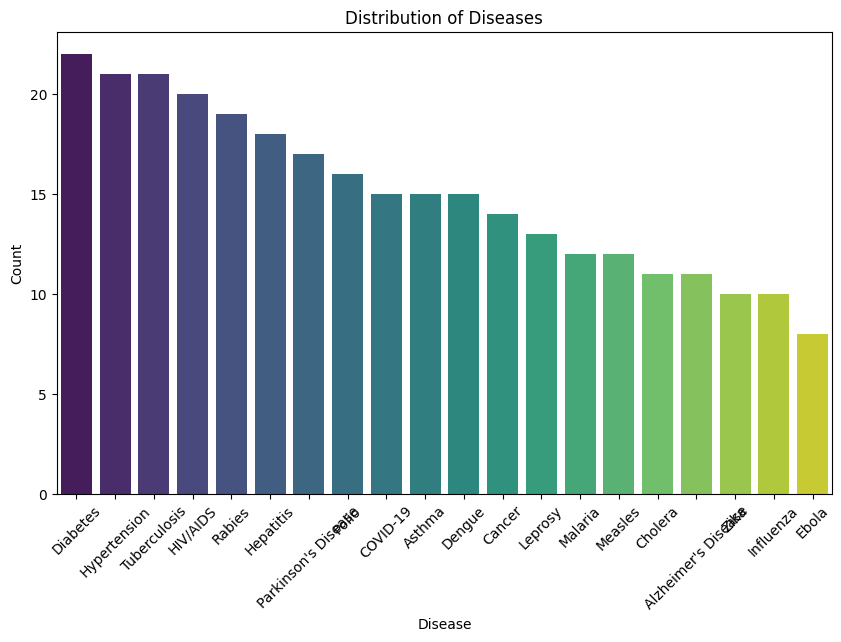

In [10]:
diseases_counts = gbh_subset['Disease Name'].value_counts()  # Count the occurrences of each disease

# Plot the distribution of diseases
plt.figure(figsize=(10, 6))
sns.barplot(x=diseases_counts.index, y=diseases_counts.values, palette="viridis")
plt.title("Distribution of Diseases")
plt.xlabel("Disease")
plt.ylabel("Count")
plt.xticks(rotation=45)
plt.show()

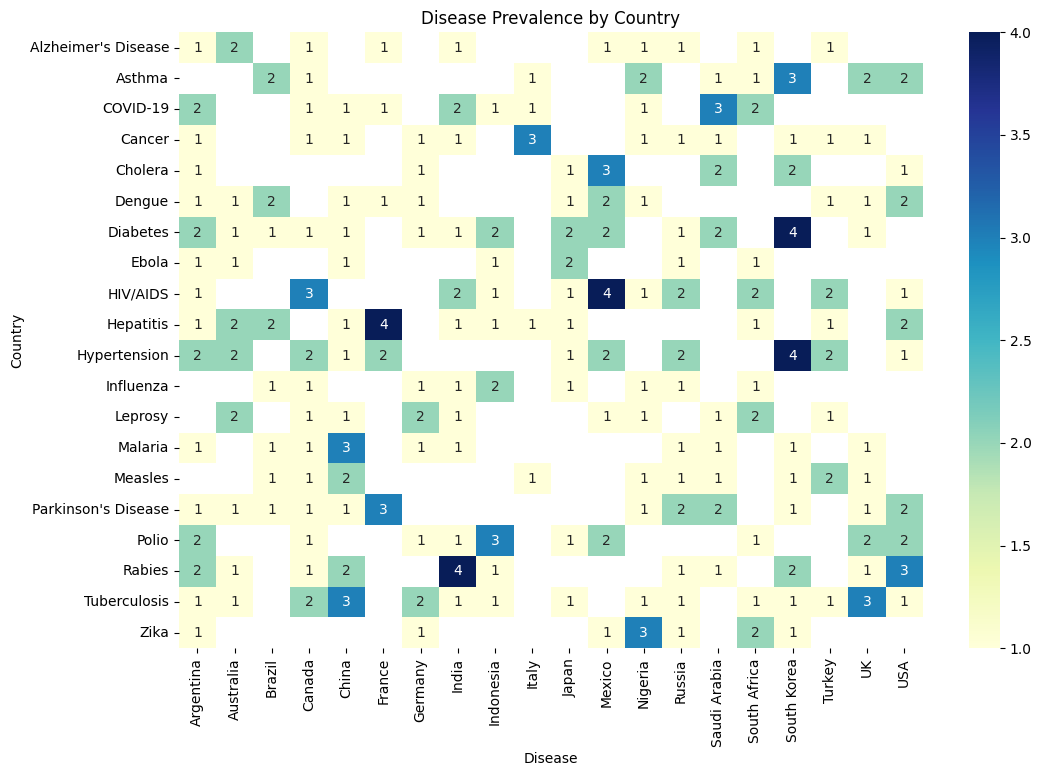

In [11]:
# Group by country and disease

country_diseases = gbh_subset.groupby(['Disease Name','Country']).size().unstack()

# Plot the heatmap
plt.figure(figsize=(12, 8))
sns.heatmap(country_diseases, cmap="YlGnBu", annot=True, fmt="g")
plt.title("Disease Prevalence by Country")
plt.xlabel("Disease")
plt.ylabel("Country")
plt.show()

In [12]:
print(gbh_subset.columns)


Index(['Country', 'Year', 'Disease Name', 'Disease Category',
       'Prevalence Rate (%)', 'Incidence Rate (%)', 'Mortality Rate (%)',
       'Age Group', 'Gender', 'Population Affected', 'Healthcare Access (%)',
       'Doctors per 1000', 'Hospital Beds per 1000', 'Treatment Type',
       'Average Treatment Cost (USD)', 'Availability of Vaccines/Treatment',
       'Recovery Rate (%)', 'DALYs', 'Improvement in 5 Years (%)',
       'Per Capita Income (USD)', 'Education Index', 'Urbanization Rate (%)'],
      dtype='object')


In [13]:
# Rename columns based on the exact column names
gbh_subset.rename(columns={
    'Healthcare Access (%)': 'Healthcare Access',
    'Population Affected': 'Population Affected',
    'Availability of Vaccines/Treatment': 'Vaccine Availability',
    'Treatment Type': 'Treatment Type',
    'Doctors per 1000': 'Doctors per 1000 People',
    'Hospital Beds per 1000': 'Hospital Beds per 1000 People',
    'Average Treatment Cost (USD)': 'Avg Treatment Cost (USD)',
    'Recovery Rate (%)': 'Recovery Rate',
    'DALYs': 'Disability-Adjusted Life Years (DALYs)',
    'Improvement in 5 Years (%)': '5 Year Improvement (%)',
    'Per Capita Income (USD)': 'Per Capita Income',
    'Education Index': 'Education Index',
    'Urbanization Rate (%)': 'Urbanization Rate',
}, inplace=True)

# Check the renamed columns
print(gbh_subset.columns)


Index(['Country', 'Year', 'Disease Name', 'Disease Category',
       'Prevalence Rate (%)', 'Incidence Rate (%)', 'Mortality Rate (%)',
       'Age Group', 'Gender', 'Population Affected', 'Healthcare Access',
       'Doctors per 1000 People', 'Hospital Beds per 1000 People',
       'Treatment Type', 'Avg Treatment Cost (USD)', 'Vaccine Availability',
       'Recovery Rate', 'Disability-Adjusted Life Years (DALYs)',
       '5 Year Improvement (%)', 'Per Capita Income', 'Education Index',
       'Urbanization Rate'],
      dtype='object')


In [14]:
feature_cols = ['Country', 'Year', 'Age Group', 'Gender',
                'Vaccine Availability', 'Treatment Type',
                'Healthcare Access', 'Population Affected']


In [15]:
gbh_subset_encoded = pd.get_dummies(gbh_subset, columns=['Country', 'Age Group', 'Gender'], drop_first=True)


In [16]:
X = gbh_subset[feature_cols]
y = gbh_subset['Disease Name']

In [17]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [18]:
# One-Hot Encode categorical features
X_encoded = pd.get_dummies(X, drop_first=True)

# Now split your data into train and test sets again (if not done previously)
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X_encoded, y, test_size=0.2, random_state=42)

# Initialize and train the model
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score

model = RandomForestClassifier(n_estimators=100, random_state=42)
model.fit(X_train, y_train)

# Make predictions
y_pred = model.predict(X_test)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy: {accuracy * 100:.2f}%')


Accuracy: 6.67%


In [19]:
print(y.value_counts())


Disease Name
Diabetes               22
Hypertension           21
Tuberculosis           21
HIV/AIDS               20
Rabies                 19
Hepatitis              18
Parkinson's Disease    17
Polio                  16
COVID-19               15
Asthma                 15
Dengue                 15
Cancer                 14
Leprosy                13
Malaria                12
Measles                12
Cholera                11
Alzheimer's Disease    11
Zika                   10
Influenza              10
Ebola                   8
Name: count, dtype: int64


In [20]:
from sklearn.ensemble import RandomForestClassifier

model = RandomForestClassifier(n_estimators=100, random_state=42, class_weight='balanced')
model.fit(X_train, y_train)

y_pred = model.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy: {accuracy * 100:.2f}%')


Accuracy: 1.67%


In [21]:
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestClassifier

# Define the parameter grid
param_grid = {
    'n_estimators': [50, 100, 200],
    'max_depth': [10, 20, 30, None],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'max_features': ['auto', 'sqrt', 'log2'],
    'class_weight': ['balanced', None]
}

# Initialize the RandomForestClassifier
model = RandomForestClassifier(random_state=42)

# Set up GridSearchCV
grid_search = GridSearchCV(estimator=model, param_grid=param_grid, cv=5, n_jobs=-1, verbose=2)

# Fit the model
grid_search.fit(X_train, y_train)

# Get the best parameters and model
best_params = grid_search.best_params_
best_model = grid_search.best_estimator_

# Evaluate the best model
y_pred = best_model.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print(f'Best Model Accuracy: {accuracy * 100:.2f}%')
print(f'Best Hyperparameters: {best_params}')


Fitting 5 folds for each of 648 candidates, totalling 3240 fits


/usr/local/lib/python3.11/dist-packages/sklearn/model_selection/_validation.py:528: FitFailedWarning: 
1080 fits failed out of a total of 3240.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
543 fits failed with the following error:
Traceback (most recent call last):
  File "/usr/local/lib/python3.11/dist-packages/sklearn/model_selection/_validation.py", line 866, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/usr/local/lib/python3.11/dist-packages/sklearn/base.py", line 1382, in wrapper
    estimator._validate_params()
  File "/usr/local/lib/python3.11/dist-packages/sklearn/base.py", line 436, in _validate_params
    validate_parameter_constraints(
  File "/usr/local/lib/python3.11/dist-packages/sklearn/ut

Best Model Accuracy: 6.67%
Best Hyperparameters: {'class_weight': None, 'max_depth': 30, 'max_features': 'sqrt', 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 100}


In [24]:
from sklearn.preprocessing import LabelEncoder

# Initialize the LabelEncoder
label_encoder = LabelEncoder()

# Encode target variable only
y_train_encoded = label_encoder.fit_transform(y_train)
y_test_encoded = label_encoder.transform(y_test)

# Now, you can use y_train_encoded and y_test_encoded for models that need encoding


In [26]:
import numpy as np
from sklearn.preprocessing import LabelEncoder
from xgboost import XGBClassifier
from sklearn.metrics import accuracy_score

# Initialize the LabelEncoder
label_encoder = LabelEncoder()

# Encode the target variable (Disease Name)
y_train_encoded = label_encoder.fit_transform(y_train)
y_test_encoded = label_encoder.transform(y_test)

# Calculate scale_pos_weight using numpy
class_counts = np.bincount(y_train_encoded)
scale_pos_weight = class_counts.max() / class_counts

# Initialize XGBoost model with scale_pos_weight
model = XGBClassifier(scale_pos_weight=scale_pos_weight, random_state=42)

# Train the model
model.fit(X_train, y_train_encoded)

# Make predictions
y_pred_encoded = model.predict(X_test)

# Convert the predictions back to the original labels (disease names)
y_pred = label_encoder.inverse_transform(y_pred_encoded)

# Evaluate the model
accuracy = accuracy_score(y_test_encoded, y_pred_encoded)
print(f'Accuracy: {accuracy * 100:.2f}%')


/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [17:23:01] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "scale_pos_weight" } are not used.

  warnings.warn(smsg, UserWarning)


Accuracy: 1.67%


In [28]:
!pip install --upgrade xgboost


In [29]:
!pip install --upgrade scikit-learn


In [32]:
from xgboost import XGBClassifier
from sklearn.model_selection import RandomizedSearchCV

# Initialize XGBClassifier with an objective for multi-class classification
model = XGBClassifier(objective='multi:softmax', random_state=42)

# Define hyperparameters to search
param_dist = {
    'n_estimators': [100, 200, 300],
    'learning_rate': [0.01, 0.1, 0.2],
    'max_depth': [3, 4, 5, 6],
    'subsample': [0.6, 0.7, 0.8],
    'colsample_bytree': [0.6, 0.7, 0.8]
}

# Initialize RandomizedSearchCV
random_search = RandomizedSearchCV(model, param_dist, n_iter=10, scoring='accuracy', cv=3, random_state=42)

# Fit the model
random_search.fit(X_train, y_train_encoded)

# Get best hyperparameters
best_params = random_search.best_params_
print(f'Best parameters: {best_params}')

# Train the best model
best_model = random_search.best_estimator_
best_model.fit(X_train, y_train_encoded)

# Make predictions
y_pred_encoded = best_model.predict(X_test)

# Convert predictions back to original labels
y_pred = label_encoder.inverse_transform(y_pred_encoded)

# Evaluate the model
accuracy = accuracy_score(y_test_encoded, y_pred_encoded)
print(f'Accuracy after hyperparameter tuning: {accuracy * 100:.2f}%')


AttributeError: 'super' object has no attribute '__sklearn_tags__'

In [33]:
from xgboost import XGBClassifier
from sklearn.metrics import accuracy_score

# Define the list of hyperparameters to try
n_estimators_list = [100, 200, 300]
learning_rate_list = [0.01, 0.1, 0.2]
max_depth_list = [3, 4, 5, 6]

# Initialize the best model
best_accuracy = 0
best_model = None

# Iterate over combinations of hyperparameters
for n_estimators in n_estimators_list:
    for learning_rate in learning_rate_list:
        for max_depth in max_depth_list:
            model = XGBClassifier(n_estimators=n_estimators,
                                  learning_rate=learning_rate,
                                  max_depth=max_depth,
                                  objective='multi:softmax',
                                  random_state=42)

            # Train the model
            model.fit(X_train, y_train_encoded)

            # Make predictions
            y_pred_encoded = model.predict(X_test)

            # Evaluate the model
            accuracy = accuracy_score(y_test_encoded, y_pred_encoded)
            print(f'Accuracy with n_estimators={n_estimators}, learning_rate={learning_rate}, max_depth={max_depth}: {accuracy * 100:.2f}%')

            # Update the best model
            if accuracy > best_accuracy:
                best_accuracy = accuracy
                best_model = model

# Output the best model and its accuracy
print(f'Best accuracy: {best_accuracy * 100:.2f}%')


Accuracy with n_estimators=100, learning_rate=0.01, max_depth=3: 5.00%
Accuracy with n_estimators=100, learning_rate=0.01, max_depth=4: 5.00%
Accuracy with n_estimators=100, learning_rate=0.01, max_depth=5: 5.00%
Accuracy with n_estimators=100, learning_rate=0.01, max_depth=6: 5.00%
Accuracy with n_estimators=100, learning_rate=0.1, max_depth=3: 3.33%
Accuracy with n_estimators=100, learning_rate=0.1, max_depth=4: 3.33%
Accuracy with n_estimators=100, learning_rate=0.1, max_depth=5: 1.67%
Accuracy with n_estimators=100, learning_rate=0.1, max_depth=6: 1.67%
Accuracy with n_estimators=100, learning_rate=0.2, max_depth=3: 3.33%
Accuracy with n_estimators=100, learning_rate=0.2, max_depth=4: 3.33%
Accuracy with n_estimators=100, learning_rate=0.2, max_depth=5: 1.67%
Accuracy with n_estimators=100, learning_rate=0.2, max_depth=6: 1.67%
Accuracy with n_estimators=200, learning_rate=0.01, max_depth=3: 5.00%
Accuracy with n_estimators=200, learning_rate=0.01, max_depth=4: 3.33%
Accuracy with 

In [34]:
!pip install tensorflow


In [35]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.optimizers import Adam
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import accuracy_score

# Initialize LabelEncoder for target variable
label_encoder = LabelEncoder()

# Encode the target variable (y)
y_train_encoded = label_encoder.fit_transform(y_train)
y_test_encoded = label_encoder.transform(y_test)

# Build a neural network model
model = Sequential([
    Dense(128, input_dim=X_train.shape[1], activation='relu'),  # Input layer
    Dense(64, activation='relu'),  # Hidden layer
    Dense(32, activation='relu'),  # Hidden layer
    Dense(len(label_encoder.classes_), activation='softmax')  # Output layer for multi-class
])

# Compile the model
model.compile(optimizer=Adam(), loss='sparse_categorical_crossentropy', metrics=['accuracy'])

# Train the model
model.fit(X_train, y_train_encoded, epochs=10, batch_size=32, validation_data=(X_test, y_test_encoded))

# Make predictions
y_pred_encoded = model.predict(X_test)
y_pred = label_encoder.inverse_transform(y_pred_encoded.argmax(axis=1))

# Evaluate the model
accuracy = accuracy_score(y_test_encoded, y_pred_encoded.argmax(axis=1))
print(f'Accuracy: {accuracy * 100:.2f}%')


/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/10
8/8 ━━━━━━━━━━━━━━━━━━━━ 8s 543ms/step - accuracy: 0.0624 - loss: 53954.2227 - val_accuracy: 0.1000 - val_loss: 29797.9805
Epoch 2/10
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - accuracy: 0.0514 - loss: 24738.3281 - val_accuracy: 0.0000e+00 - val_loss: 21263.2129
Epoch 3/10
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - accuracy: 0.0648 - loss: 15774.6123 - val_accuracy: 0.0500 - val_loss: 15880.1504
Epoch 4/10
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - accuracy: 0.0761 - loss: 12699.1445 - val_accuracy: 0.0500 - val_loss: 10731.0527
Epoch 5/10
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - accuracy: 0.0646 - loss: 9785.5068 - val_accuracy: 0.0333 - val_loss: 7370.2554
Epoch 6/10
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - accuracy: 0.0712 - loss: 7105.1816 - val_accuracy: 0.0333 - val_loss: 5832.2285
Epoch 7/10
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - accuracy: 0.0792 - loss: 4166.8818 - val_accuracy: 0.0167 - val_loss: 5514.9009
Epoch 8/10
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - accuracy: 0.0557 - 